# A1: Predicting Car Price

### Task 1. Preparing the datasets 
Download the Car Price dataset from Google classroom. Perform loading, EDA, preprocessing, model selection, ···, inference. Grade will be given based on the how well
you adhere to best practices. There are some important coding considerations:
- For the feature owner, map First owner to 1, ..., Test Drive Car to 5
- For the feature fuel, remove all rows with CNG and LPG because CNG and LPG use a different
mileage system i.e., km/kg which is different from kmfeaturepl for Diesel and Petrol
- For the feature mileage, remove “kmpl” and convert the column to numerical type (e.g., float).
Hint: use df.mileage.str.split
- For the feature engine, remove “CC” and convert the column to numerical type (e.g., float)
- Do the same for max power
- For the feature brand, take only the first word and remove the rest
- Drop the feature torque, simply because Chaky’s company does not understand well about it
- You will found out that Test Drive Cars are ridiculously expensive. Since we do not want to
involve this, we will simply delete all samples related to it.
- Since selling price is a big number, it can cause your prediction to be very unstable. One trick
is to first transform the label using log transform, i.e.,

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [2]:
#Get data from .csv file
dt = pd.read_csv("../data/Cars.csv")
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
#Check a number of feature and target.
dt.shape

(8128, 13)

In [4]:
#Check information of data.
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


### Clean data
follow coding considerations:

In [5]:
#Map feature "owner" to a number (1,2,3,4,5).
Owner_map = {"First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5}

dt['owner']=dt['owner'].map(Owner_map)
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [6]:
#Remove all rows with CNG and LPG in feature "fuel".
dt = dt[(dt['fuel'] != 'CNG') & (dt['fuel'] != 'LPG')]
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [7]:
#Remove “kmpl” and convert the column to numerical type in feature "mileage".
dt['mileage']=dt['mileage'].str.split().str[0].astype(float)
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [8]:
#Remove “CC” and convert the column to numerical type in feature "engine".
dt['engine']=dt['engine'].str.split().str[0].astype(float)
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [9]:
#Remove “bhp” and convert the column to numerical type in feature "max_power".
dt['max_power']=dt['max_power'].str.split().str[0].astype(float)
dt.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [10]:
#Remove words and rename in feature "name" into "brand".
dt['name']=dt['name'].str.split().str[0]
dt = dt.rename(columns={'name':'brand'})
dt.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [11]:
#Drop data in column "torque".
dt=dt.drop(columns =['torque'])
dt.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [12]:
#Remove rows with  "owner" = 5.
dt = dt[(dt['owner'] != 5)]
dt.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


In [13]:
#Check data in feature "owner", it does not contain owner = 5.
dt['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64

In [14]:
#Check dataframe structure.
dt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8028 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   brand          8028 non-null   object 
 1   year           8028 non-null   int64  
 2   selling_price  8028 non-null   int64  
 3   km_driven      8028 non-null   int64  
 4   fuel           8028 non-null   object 
 5   seller_type    8028 non-null   object 
 6   transmission   8028 non-null   object 
 7   owner          8028 non-null   int64  
 8   mileage        7814 non-null   float64
 9   engine         7814 non-null   float64
 10  max_power      7820 non-null   float64
 11  seats          7814 non-null   float64
dtypes: float64(4), int64(4), object(4)
memory usage: 815.3+ KB


## 2. Exploratory Data Analysis

#### Countplot

<Axes: xlabel='owner', ylabel='count'>

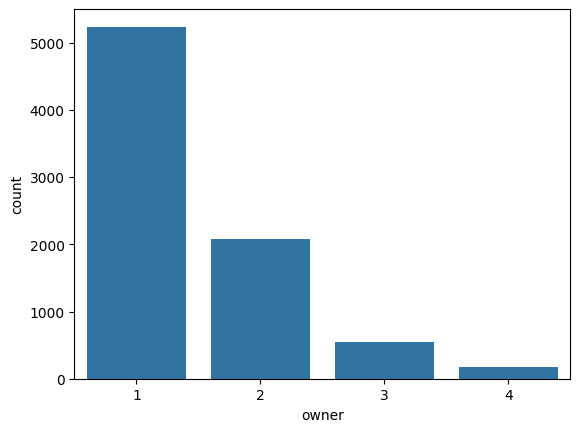

In [15]:
sns.countplot(data = dt, x = 'owner')

<Axes: xlabel='seller_type', ylabel='count'>

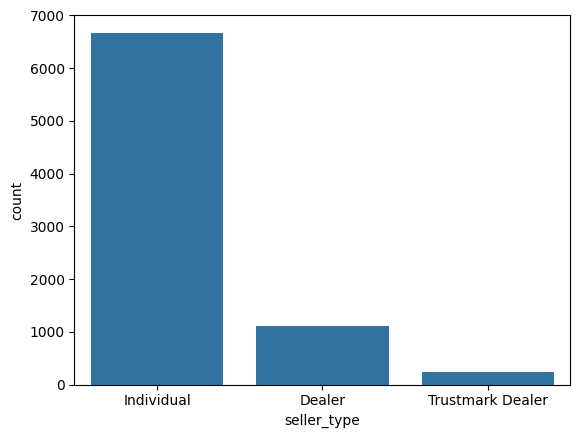

In [16]:
sns.countplot(data = dt, x = 'seller_type')

#### Distribution plot

Text(0.5, 1.0, 'Selling Price')

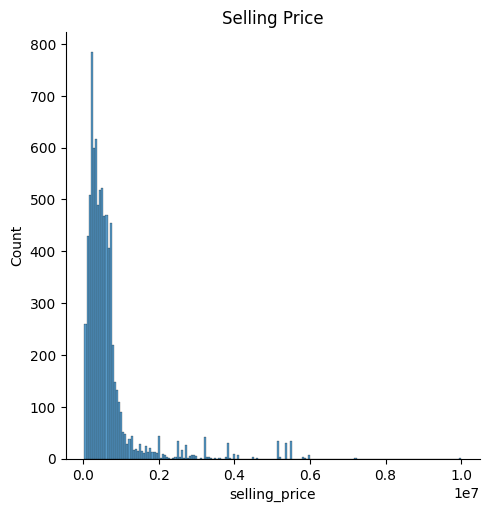

In [17]:
sns.displot(data = dt, x = dt['selling_price'])
plt.title("Selling Price")

#### 2.2 Multivariate analysis

#### Boxplot

Text(0.5, 0, 'Owner Type')

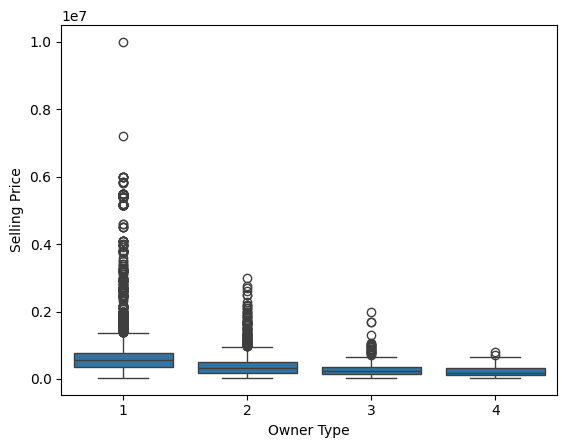

In [18]:
# Let's try bar plot on "owner"
sns.boxplot(x = dt["owner"], y = dt['selling_price']);
plt.ylabel("Selling Price")
plt.xlabel("Owner Type")

#### Scatterplot

<Axes: xlabel='mileage', ylabel='selling_price'>

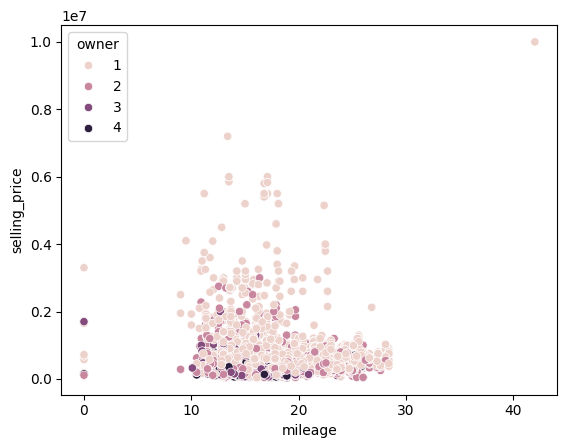

In [19]:
sns.scatterplot(x = dt['mileage'], y = dt['selling_price'], hue=dt['owner'])

<Axes: xlabel='max_power', ylabel='selling_price'>

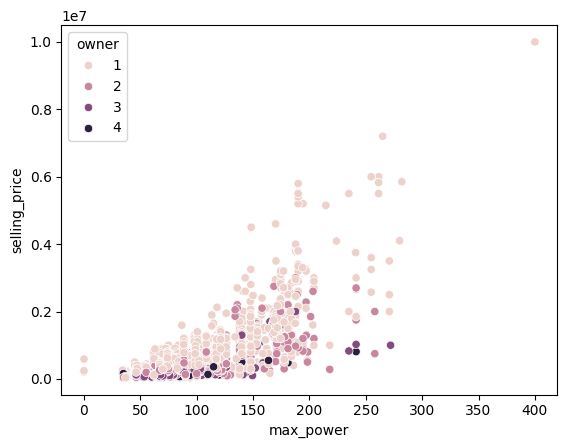

In [20]:
sns.scatterplot(x = dt['max_power'], y = dt['selling_price'], hue=dt['owner'])

#### Correlation Matrix

In [21]:
dt.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

In [22]:
#Convert categorical feature into numerical feature by one hot encoding.
dt= pd.get_dummies(dt, columns=['fuel','transmission','seller_type','owner'],drop_first=True)

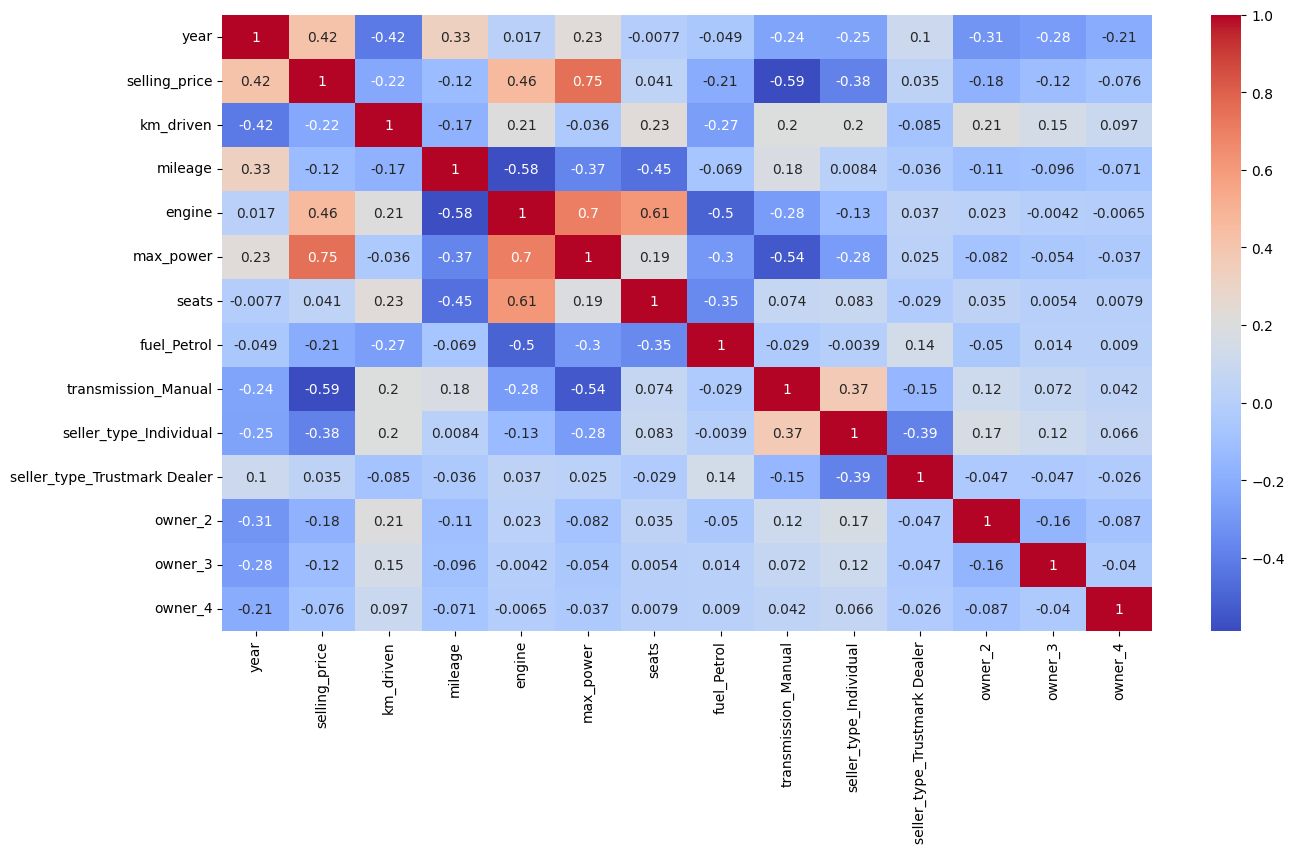

In [23]:
#Let's check out heatmap
plt.figure(figsize=(15,8))
sns.heatmap(dt.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

## 3. Feature selection

In [24]:
dt.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'mileage', 'engine',
       'max_power', 'seats', 'fuel_Petrol', 'transmission_Manual',
       'seller_type_Individual', 'seller_type_Trustmark Dealer', 'owner_2',
       'owner_3', 'owner_4'],
      dtype='object')

In [25]:
#let X 
X = dt.drop(columns=['selling_price','engine','seats','brand']) 
#y is selling price
y = dt['selling_price']

### Train test split

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
#Apply log transformation to y_train.
y_train_log = np.log(y_train)
y_train_log

6853    12.980800
1495    12.899220
7904    13.122363
1281    12.154779
1421    12.278393
          ...    
5293    12.611538
5461    12.847927
865     13.527828
7701    15.454507
7366    13.560618
Name: selling_price, Length: 5619, dtype: float64

## 4. Preprocessing

In [28]:
#Check for null values in X_train set.
X_train.isna().sum()

year                              0
km_driven                         0
mileage                         154
max_power                       149
fuel_Petrol                       0
transmission_Manual               0
seller_type_Individual            0
seller_type_Trustmark Dealer      0
owner_2                           0
owner_3                           0
owner_4                           0
dtype: int64

In [29]:
#Check for null values in X_test set.
X_test.isna().sum()

year                             0
km_driven                        0
mileage                         60
max_power                       59
fuel_Petrol                      0
transmission_Manual              0
seller_type_Individual           0
seller_type_Trustmark Dealer     0
owner_2                          0
owner_3                          0
owner_4                          0
dtype: int64

In [30]:
#Check for null values in y_train set.
y_train_log.isna().sum()

np.int64(0)

In [31]:
#Check for null values in y_test set.
y_test.isna().sum()

np.int64(0)

#### Fill the missing values

In [32]:
#Fill the trianing set ('max_power' and 'mileage')
#Fill missing values with the median
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [33]:
#Fill the test set ('max_power' and 'mileage')
#Fill missing values with the median
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True)

In [34]:
#Check for null values in X_train set again.
X_train.isna().sum()

year                            0
km_driven                       0
mileage                         0
max_power                       0
fuel_Petrol                     0
transmission_Manual             0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
owner_2                         0
owner_3                         0
owner_4                         0
dtype: int64

In [35]:
#Check for null values in X_test set again.
X_test.isna().sum()

year                            0
km_driven                       0
mileage                         0
max_power                       0
fuel_Petrol                     0
transmission_Manual             0
seller_type_Individual          0
seller_type_Trustmark Dealer    0
owner_2                         0
owner_3                         0
owner_4                         0
dtype: int64

### Scaling

In [36]:
X_train

,year,km_driven,mileage,max_power,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_2,owner_3,owner_4
6853,2015,120000,13.58,72.40,False,True,True,False,False,False,False
1495,2013,90000,15.96,62.10,False,True,True,False,True,False,False
7904,2013,92000,20.77,88.76,False,True,True,False,False,True,False
1281,2010,100000,18.80,90.00,False,True,True,False,True,False,False
1421,2010,120000,23.00,90.00,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5293,2013,40000,20.36,78.90,True,True,True,False,False,False,False
5461,2016,39000,20.51,67.04,True,True,True,False,False,True,False
865,2015,14000,20.77,88.76,False,True,True,False,False,False,False
7701,2019,20000,22.37,214.56,True,False,False,False,False,False,False


In [37]:
from sklearn.preprocessing import StandardScaler

num_features = ['year','km_driven','mileage','max_power']

scaler = StandardScaler().fit(X_train[num_features])
X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

In [38]:
X_train

,year,km_driven,mileage,max_power,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_2,owner_3,owner_4
6853,0.284563,0.830335,-1.472315,-0.547545,False,True,True,False,False,False,False
1495,-0.215581,0.331836,-0.871732,-0.838350,False,True,True,False,True,False,False
7904,-0.215581,0.365070,0.342052,-0.085646,False,True,True,False,False,True,False
1281,-0.965798,0.498003,-0.155069,-0.050636,False,True,True,False,True,False,False
1421,-0.965798,0.830335,0.904783,-0.050636,False,True,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
5293,-0.215581,-0.498995,0.238590,-0.364028,True,True,True,False,False,False,False
5461,0.534636,-0.515612,0.276442,-0.698877,True,True,True,False,False,True,False
865,0.284563,-0.931028,0.342052,-0.085646,False,True,True,False,False,False,False
7701,1.284852,-0.831328,0.745805,3.466127,True,False,False,False,False,False,False


In [39]:
#Check shape of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train_log.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 11)
Shape of X_test:  (2409, 11)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


## 5. Modeling

In [40]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train_log)
yhat_log = lr.predict(X_test)
yhat = np.exp(yhat_log)
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  104053428544.84752
r2:  0.8442947937884817


### Cross validation

In [41]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score

#Find the best model.
#Define a list.
models = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]
#Make a model name list
models_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

#KFold cross-validation setup.
kfold = KFold(n_splits=5, shuffle=True,random_state=42)

#Loop for each model and evaluate using cross-validation
for i, model in enumerate(models):
    scores = cross_val_score(model, X_train, y_train_log, cv=kfold, scoring='r2')
    print(f"{models_names[i]} - R² per fold: {scores}; Mean R²: {scores.mean()}")

Linear Regression - R² per fold: [0.84199108 0.86590485 0.8584138  0.86386972 0.86686406]; Mean R²: 0.8594087030129831
SVR - R² per fold: [0.89211092 0.89411478 0.89156916 0.89393721 0.90213685]; Mean R²: 0.8947737822086002
KNeighbors Regressor - R² per fold: [0.88087942 0.88137266 0.88673741 0.88304784 0.8912261 ]; Mean R²: 0.8846526857136938
Decision-Tree Regressor - R² per fold: [0.86757717 0.85556356 0.87699467 0.87560471 0.87695383]; Mean R²: 0.870538788298805
Random-Forest Regressor - R² per fold: [0.92329422 0.92301322 0.92887545 0.92919835 0.9335461 ]; Mean R²: 0.9275854662611958


### Grid Search

In [42]:
#Use Random-Forest Regressor because it gives the best r2
from sklearn.model_selection import GridSearchCV
param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
new_model = RandomForestRegressor(random_state = 1)
grid = GridSearchCV(estimator = new_model,param_grid = param_grid, cv = kfold, n_jobs = -1,return_train_score=True,refit=True,scoring='r2')
# Fit grid_search
grid.fit(X_train, y_train_log)

,estimator,RandomForestR...andom_state=1)
,param_grid,"{'bootstrap': [True], 'max_depth': [5, 10, ...], 'n_estimators': [5, 6, ...]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,15


In [43]:
print("Best Parameters:", grid.best_params_)
print("Best CV R²:", grid.best_score_)

Best Parameters: {'bootstrap': True, 'max_depth': None, 'n_estimators': 15}
Best CV R²: 0.9214053078592892


## 6. Testing

In [44]:
yhat_log=grid.predict(X_test)
yhat=np.exp(yhat_log)
rmse = np.sqrt(mean_squared_error(y_test, yhat))
print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))
print("RMSE:", rmse)


MSE:  33039058003.517136
r2:  0.9505604629139662
RMSE: 181766.49307151505


In [45]:
#Check max-min of y_test
print("Min:", y_test.min())
print("Max:", y_test.max())

Min: 31000
Max: 10000000


## 7. Feature Importance

In [46]:
new_model = grid.best_estimator_
new_model.feature_importances_

array([4.55768947e-01, 2.87717537e-02, 4.34536854e-02, 4.45990445e-01,
       1.32361889e-02, 2.47708170e-03, 2.55115207e-03, 6.40782638e-05,
       4.07313109e-03, 2.48159203e-03, 1.13194522e-03])

<BarContainer object of 11 artists>

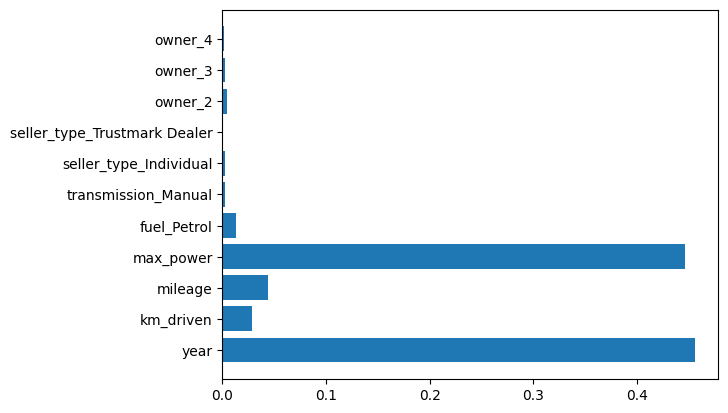

In [47]:
#Plot feature importances
plt.barh(X_train.columns, new_model.feature_importances_)

## 8. Inference

In [51]:
import pickle
# save the model and scalar to disk
filename_model = '../app/code/model/model.pkl'
pickle.dump(grid, open(filename_model, 'wb'))
filename_scalar = '../app/code/model/scalar.pkl'
pickle.dump(scaler, open(filename_scalar, 'wb'))

In [52]:
# load the model and scalar from disk
loaded_model = pickle.load(open(filename_model, 'rb'))
loaded_scalar = pickle.load(open(filename_scalar, 'rb'))

In [53]:
X_train.loc[1]

year                            0.034491
km_driven                       0.830335
mileage                          0.43542
max_power                       0.331081
fuel_Petrol                        False
transmission_Manual                 True
seller_type_Individual              True
seller_type_Trustmark Dealer       False
owner_2                             True
owner_3                            False
owner_4                            False
Name: 1, dtype: object

### Unseen sample

In [54]:
#Create unseen data consist of 11 features
# 0 = False , 1 = True
Unseen_dt = np.array([2020,50000,25.05, 100.0,1, 1,0, 0, 0,1,0], dtype=float).reshape(1, -1)

#Convert the unseen data into a DataFrame and correct dtypes.
unseen_df = pd.DataFrame(Unseen_dt, columns=X_train.columns)
unseen_df['year'] = unseen_df['year'].astype('int16')
unseen_df['fuel_Petrol'] = unseen_df['fuel_Petrol'].astype('bool')
unseen_df['transmission_Manual'] = unseen_df['transmission_Manual'].astype('bool')
unseen_df['seller_type_Individual'] = unseen_df['seller_type_Individual'].astype('bool')
unseen_df['seller_type_Trustmark Dealer'] = unseen_df['seller_type_Trustmark Dealer'].astype('bool')
unseen_df['owner_2'] = unseen_df['owner_2'].astype('bool')
unseen_df['owner_3'] = unseen_df['owner_3'].astype('bool')
unseen_df['owner_4'] = unseen_df['owner_4'].astype('bool')
unseen_df


,year,km_driven,mileage,max_power,fuel_Petrol,transmission_Manual,seller_type_Individual,seller_type_Trustmark Dealer,owner_2,owner_3,owner_4
0,2020,50000.0,25.05,100.0,True,True,False,False,False,True,False


In [55]:
unseen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   year                          1 non-null      int16  
 1   km_driven                     1 non-null      float64
 2   mileage                       1 non-null      float64
 3   max_power                     1 non-null      float64
 4   fuel_Petrol                   1 non-null      bool   
 5   transmission_Manual           1 non-null      bool   
 6   seller_type_Individual        1 non-null      bool   
 7   seller_type_Trustmark Dealer  1 non-null      bool   
 8   owner_2                       1 non-null      bool   
 9   owner_3                       1 non-null      bool   
 10  owner_4                       1 non-null      bool   
dtypes: bool(7), float64(3), int16(1)
memory usage: 165.0 bytes


In [56]:
#scaling in 3 features (num)
unseen_df.loc[:, num_features] = loaded_scalar.transform(unseen_df[num_features])

In [57]:
predict_log=loaded_model.predict(unseen_df)
Car_Price_Prediction=np.exp(predict_log)
Car_Price_Prediction

array([633980.76882099])

# Task 2. Report

The two important predictors of selling_price are year and max_power. This is supported by *correlation matrix* (max_power: r ≈ 0.75; year: r ≈ 0.42) and *Random Forest feature importance*, where these two features together for ~90% of the total importance. By contrast, the categorical features (e.g., fuel, transmission, seller_type, owner) contribute only small signal because they have lower granularity than numerical features (0/1 dummies offer fewer split points).

After 5-fold cross-validation and evaluation on the test set, Random Forest achieved the best performance ( R² ≈ 0.92), ahead of Linear Regression (≈ 0.86), KNeighbors (≈ 0.87), and a Decision Tree (≈ 0.87). Random Forest wins here because it captures non-linear relationships and feature interactions automatically, requires minimal feature engineering, and is less sensitive to scaling and outliers.

## Task 3. Deployment

Github: https://github.com/APS2542/ML-Assignment.git 